In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

In [8]:
def func(th, z, eta, d):
    return np.exp(-eta/2*((1 - np.cos(th) + d)**2 + (np.sin(th) - z)**2))

In [84]:
def estimate_kon(exp, nt, eta, d, offset=.5):
    N = 2**exp
    th_mesh = np.linspace(-np.pi/2, np.pi/2, N+1)[:-1]
    nu = th_mesh[1] - th_mesh[0]
    th_mesh += nu*offset
    
    bond_max = nt*nu
    return np.sqrt(2*np.pi/eta)*bond_max*np.sum(np.exp(-eta/2*(1-np.cos(th_mesh) + d)**2))

In [40]:
np.random.rand()

0.3510262241487241

In [25]:
L = 2.5
dblquad(func, -L, L, -np.pi/2, np.pi/2, (2.34e4, 10**(-1.5)))

(1.1969704476426875e-08, 1.3468923970088502e-08)

In [35]:
d = np.logspace(-3, -1.5)
print(d)
integral = [dblquad(func, -L, L, -np.pi/2, np.pi/2, (2.34e4, d_el))[0] for d_el in d]

[0.001      0.00107303 0.0011514  0.00123548 0.00132571 0.00142253
 0.00152642 0.00163789 0.00175751 0.00188586 0.00202359 0.00217137
 0.00232995 0.00250011 0.0026827  0.00287862 0.00308884 0.00331442
 0.00355648 0.00381621 0.00409492 0.00439397 0.00471487 0.0050592
 0.00542868 0.00582514 0.00625055 0.00670704 0.00719686 0.00772245
 0.00828643 0.00889159 0.00954095 0.01023774 0.01098541 0.01178769
 0.01264855 0.01357229 0.01456348 0.01562707 0.01676833 0.01799294
 0.01930698 0.02071698 0.02222996 0.02385344 0.02559548 0.02746474
 0.02947052 0.03162278]


In [36]:
data_array = np.zeros(shape=(50, 2))

In [37]:
data_array[:, 0] = d
data_array[:, 1] = integral
print(data_array)

[[1.00000000e-03 3.72369619e-03]
 [1.07303094e-03 3.69899831e-03]
 [1.15139540e-03 3.67228432e-03]
 [1.23548289e-03 3.64338958e-03]
 [1.32571137e-03 3.61212610e-03]
 [1.42252931e-03 3.57829375e-03]
 [1.52641797e-03 3.54167266e-03]
 [1.63789371e-03 3.50203175e-03]
 [1.75751062e-03 3.45911918e-03]
 [1.88586328e-03 3.41266070e-03]
 [2.02358965e-03 3.36237740e-03]
 [2.17137430e-03 3.30794782e-03]
 [2.32995181e-03 3.24906606e-03]
 [2.50011038e-03 3.18539131e-03]
 [2.68269580e-03 3.11656376e-03]
 [2.87861559e-03 3.04224322e-03]
 [3.08884360e-03 2.96207021e-03]
 [3.31442475e-03 2.87569785e-03]
 [3.55648031e-03 2.78279856e-03]
 [3.81621341e-03 2.68307745e-03]
 [4.09491506e-03 2.57629465e-03]
 [4.39397056e-03 2.46227899e-03]
 [4.71486636e-03 2.34096163e-03]
 [5.05919749e-03 2.21240819e-03]
 [5.42867544e-03 2.07684303e-03]
 [5.82513671e-03 1.93470197e-03]
 [6.25055193e-03 1.78666192e-03]
 [6.70703561e-03 1.63367300e-03]
 [7.19685673e-03 1.47701906e-03]
 [7.72244995e-03 1.31830833e-03]
 [8.286427

In [38]:
np.savetxt('integral.dat', data_array, delimiter=",")

plt.semilogx(d, integral)
plt.show()

In [71]:
dblquad(func, -L, L, -np.pi/2, np.pi/2, (2.34e4, .01))[0]*5000

3.7597648038045177

In [81]:
estimate_kon(7, 5000, 2.34e4, .01, perturb=True)

[0.02153801 0.04608171 0.0706254  0.09516909 0.11971278 0.14425648
 0.16880017 0.19334386 0.21788755 0.24243125 0.26697494 0.29151863
 0.31606232 0.34060602 0.36514971 0.3896934  0.4142371  0.43878079
 0.46332448 0.48786817 0.51241187 0.53695556 0.56149925 0.58604294
 0.61058664 0.63513033 0.65967402 0.68421771 0.70876141 0.7333051
 0.75784879 0.78239248 0.80693618 0.83147987 0.85602356 0.88056725
 0.90511095 0.92965464 0.95419833 0.97874203 1.00328572 1.02782941
 1.0523731  1.0769168  1.10146049 1.12600418 1.15054787 1.17509157
 1.19963526 1.22417895 1.24872264 1.27326634 1.29781003 1.32235372
 1.34689741 1.37144111 1.3959848  1.42052849 1.44507218 1.46961588
 1.49415957 1.51870326 1.54324696 1.56779065 1.59233434 1.61687803
 1.64142173 1.66596542 1.69050911 1.7150528  1.7395965  1.76414019
 1.78868388 1.81322757 1.83777127 1.86231496 1.88685865 1.91140234
 1.93594604 1.96048973 1.98503342 2.00957711 2.03412081 2.0586645
 2.08320819 2.10775189 2.13229558 2.15683927 2.18138296 2.205926

3.767359383583956

In [111]:
d = .01
eta = 2.34e4
num = 1024
th = np.linspace(-np.pi/10, np.pi/10, num=128)
z = np.linspace(-L/10, L/10, num=num)

y = np.exp(-eta/2*((1 - np.cos(th[None, :]) + d)**2 + (np.sin(th[None, :]) - z[:, None])**2))

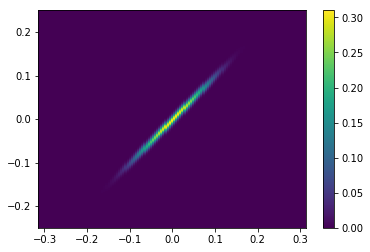

In [112]:
plt.pcolormesh(th, z, y)
plt.colorbar()
plt.show()

[-0.00021446973278199666, -0.00021446973278167747, -0.00021446973278112236, -0.0002144697327810252, -0.00021446973278076154, -0.00021446973278098358, -0.00021446973278023418, -0.00021446973277969295, -0.00021446973277937376, -0.00021446973277799986, -0.00021446973277761128, -0.00021446973277738923, -0.00021446973277644554, -0.00021446973277569614, -0.00021446973277557124, -0.00021446973277455816, -0.00021446973277366999, -0.00021446973277298997, -0.00021446973277243486, -0.0002144697327722822, -0.00021446973277101933, -0.0002144697327719769, -0.00021446973277129688, -0.00021446973277114423, -0.00021446973277139403, -0.00021446973277139403, -0.00021446973277114423, -0.00021446973277129688, -0.00021446973277174097, -0.00021446973277144954, -0.00021446973277229608, -0.00021446973277243486, -0.00021446973277300385, -0.0002144697327736561, -0.00021446973277455816, -0.00021446973277557124, -0.00021446973277611248, -0.00021446973277644554, -0.00021446973277713943, -0.0002144697327775974, -0.0

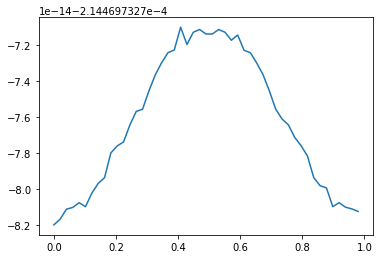

In [90]:
offset = np.linspace(0, 1)[:-1]
exact = dblquad(func, -L, L, -np.pi/2, np.pi/2, (2.34e4, .01))[0]*5000
result = [.4/estimate_kon(7, 5000, 2.34e4, .01, offset=off)-.4/exact for off in offset]
print(result)
plt.plot(offset, result)
plt.show()